In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.shape

(303, 14)

In [4]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [6]:
test = df['target']

train = df.drop(['target'],axis = 1)



In [7]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split,RandomizedSearchCV,cross_val_score

In [9]:
from sklearn import metrics

In [10]:
tree_params = {
    'n_estimators':[int(x) for x in np.linspace(start=1,stop=1200,num=10)],
    'max_depth':[int(x) for x in np.linspace(start=1,stop=30,num=5)],
    'min_samples_split':[2,5,10,15],
    'min_samples_leaf':[2,5,10,15],
    'max_features':['auto','sqrt'],
}

In [11]:
r_est = RandomizedSearchCV(RandomForestClassifier(),param_distributions=tree_params,cv = 5,n_iter=10,verbose=2,scoring='accuracy',
                          return_train_score=False)
r_est.fit(train,test)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=1 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=1, total=   1.8s
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=1 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.7s remaining:    0.0s


[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=1, total=   1.4s
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=1 
[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=1, total=   1.5s
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=1 
[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=1, total=   1.6s
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=1 
[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=1, total=   1.5s
[CV] n_estimators=1200, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=22 
[CV]  n_estimators=1200, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=22, total=   5.1s
[CV] n_estimators=1200, min_samples_split=2, min_samples_

[CV]  n_estimators=267, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=8, total=   1.2s
[CV] n_estimators=267, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=8 
[CV]  n_estimators=267, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=8, total=   1.0s
[CV] n_estimators=267, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=8 
[CV]  n_estimators=267, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=8, total=   1.0s
[CV] n_estimators=267, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=8 
[CV]  n_estimators=267, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=8, total=   1.1s
[CV] n_estimators=267, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=8 
[CV]  n_estimators=267, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=8, total=   1.2s
[CV] n_estimators=533, min_samples_split=10, min_sam

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  2.0min finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [1, 8, 15, 22, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [2, 5, 10, 15],
                                        'min_samples_split': [2, 5, 10, 15],
                                        'n_estimators': [1, 134, 267, 400, 533,
                                                         667, 800, 933, 1066,
                                                         1200]},
                   scoring='accuracy', verbose=2)

In [12]:
r_est.best_score_

0.8381967213114754

In [13]:
d_tree = {
    'max_depth':[int(x) for x in np.linspace(start=1,stop=30,num=5)],
    'min_samples_split':[2,5,10,15],
    'min_samples_leaf':[2,5,10,15],
}

In [14]:
dtree_est = RandomizedSearchCV(DecisionTreeClassifier(),param_distributions=d_tree,cv = 5,n_iter=10,verbose=2,scoring='accuracy',
                          return_train_score=False)
dtree_est.fit(train,test)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] min_samples_split=2, min_samples_leaf=2, max_depth=8 ............
[CV]  min_samples_split=2, min_samples_leaf=2, max_depth=8, total=   0.0s
[CV] min_samples_split=2, min_samples_leaf=2, max_depth=8 ............
[CV]  min_samples_split=2, min_samples_leaf=2, max_depth=8, total=   0.0s
[CV] min_samples_split=2, min_samples_leaf=2, max_depth=8 ............
[CV]  min_samples_split=2, min_samples_leaf=2, max_depth=8, total=   0.0s
[CV] min_samples_split=2, min_samples_leaf=2, max_depth=8 ............
[CV]  min_samples_split=2, min_samples_leaf=2, max_depth=8, total=   0.0s
[CV] min_samples_split=2, min_samples_leaf=2, max_depth=8 ............
[CV]  min_samples_split=2, min_samples_leaf=2, max_depth=8, total=   0.0s
[CV] min_samples_split=15, min_samples_leaf=15, max_depth=22 .........
[CV]  min_samples_split=15, min_samples_leaf=15, max_depth=22, total=   0.0s
[CV] min_samples_split=15, min_samples_leaf=15, max_depth=22 .....

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s



[CV] min_samples_split=5, min_samples_leaf=15, max_depth=15 ..........
[CV]  min_samples_split=5, min_samples_leaf=15, max_depth=15, total=   0.0s
[CV] min_samples_split=5, min_samples_leaf=15, max_depth=15 ..........
[CV]  min_samples_split=5, min_samples_leaf=15, max_depth=15, total=   0.0s
[CV] min_samples_split=5, min_samples_leaf=15, max_depth=15 ..........
[CV]  min_samples_split=5, min_samples_leaf=15, max_depth=15, total=   0.0s
[CV] min_samples_split=5, min_samples_leaf=15, max_depth=15 ..........
[CV]  min_samples_split=5, min_samples_leaf=15, max_depth=15, total=   0.0s
[CV] min_samples_split=10, min_samples_leaf=5, max_depth=22 ..........
[CV]  min_samples_split=10, min_samples_leaf=5, max_depth=22, total=   0.0s
[CV] min_samples_split=10, min_samples_leaf=5, max_depth=22 ..........
[CV]  min_samples_split=10, min_samples_leaf=5, max_depth=22, total=   0.0s
[CV] min_samples_split=10, min_samples_leaf=5, max_depth=22 ..........
[CV]  min_samples_split=10, min_samples_leaf=5

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.6s finished


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'max_depth': [1, 8, 15, 22, 30],
                                        'min_samples_leaf': [2, 5, 10, 15],
                                        'min_samples_split': [2, 5, 10, 15]},
                   scoring='accuracy', verbose=2)

In [15]:
dtree_est.best_score_

0.8183060109289617

In [17]:
dtree_est.best_estimator_

DecisionTreeClassifier(max_depth=22, min_samples_leaf=15, min_samples_split=5)

In [18]:
import pycaret


ModuleNotFoundError: No module named 'pycaret'

In [19]:
train_temp = train.copy()
ss = StandardScaler()
train_scaled = ss.fit_transform(train)

In [20]:
r_est = RandomizedSearchCV(RandomForestClassifier(),param_distributions=tree_params,cv = 5,n_iter=10,verbose=2,scoring='accuracy',
                          return_train_score=False)
r_est.fit(train_scaled,test)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=1200, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=30 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=1200, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=30, total=   4.8s
[CV] n_estimators=1200, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=30 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.7s remaining:    0.0s


[CV]  n_estimators=1200, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=30, total=   4.7s
[CV] n_estimators=1200, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=30 
[CV]  n_estimators=1200, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=30, total=   4.7s
[CV] n_estimators=1200, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=30 
[CV]  n_estimators=1200, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=30, total=   4.7s
[CV] n_estimators=1200, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=30 
[CV]  n_estimators=1200, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=30, total=   4.7s
[CV] n_estimators=1066, min_samples_split=2, min_samples_leaf=15, max_features=sqrt, max_depth=8 
[CV]  n_estimators=1066, min_samples_split=2, min_samples_leaf=15, max_features=sqrt, max_depth=8, total=   4.4s
[CV] n_estimators=1066, min_samples_split=2

[CV]  n_estimators=134, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=1, total=   0.5s
[CV] n_estimators=134, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=1 
[CV]  n_estimators=134, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=1, total=   0.5s
[CV] n_estimators=134, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=1 
[CV]  n_estimators=134, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=1, total=   0.5s
[CV] n_estimators=134, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=1 
[CV]  n_estimators=134, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=1, total=   0.4s
[CV] n_estimators=134, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=1 
[CV]  n_estimators=134, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=1, total=   0.5s


[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  2.0min finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [1, 8, 15, 22, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [2, 5, 10, 15],
                                        'min_samples_split': [2, 5, 10, 15],
                                        'n_estimators': [1, 134, 267, 400, 533,
                                                         667, 800, 933, 1066,
                                                         1200]},
                   scoring='accuracy', verbose=2)

In [21]:
r_est.best_score_

0.8414754098360655

In [22]:
model_params = {
    'logistic':{
        'model': LogisticRegression(),
        'params':{
            'C' : [0.25,0.50,0.75,1.0],
            'tol':[1e-15,1e-10,1e-5,0.001,0.00,0.25],
            'solver':['saga','lbfgs'],
            'max_iter':[int(x) for x in np.linspace(start=1,stop=200,num=10)]
        }
    },
    'SVM':{
        'model': SVC(gamma='auto'),
        'params':{
            'C':[0.25,0.50,0.75,1.0],
            'kernel':['linear','poly','sigmoid'],
        }
    }
}

In [23]:
scores =[]
for model_name,mp in model_params.items():
    clf = RandomizedSearchCV(mp['model'],mp['params'],cv = 5,n_iter=10,verbose=2,scoring='accuracy',return_train_score=False)
    clf.fit(train_scaled,test)
    scores.append({
        'model_name': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_,
        'best_estimator': clf.best_estimator_,
    })

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] tol=1e-10, solver=lbfgs, max_iter=177, C=0.5 ....................
[CV] ..... tol=1e-10, solver=lbfgs, max_iter=177, C=0.5, total=   0.1s
[CV] tol=1e-10, solver=lbfgs, max_iter=177, C=0.5 ....................
[CV] ..... tol=1e-10, solver=lbfgs, max_iter=177, C=0.5, total=   0.0s
[CV] tol=1e-10, solver=lbfgs, max_iter=177, C=0.5 ....................
[CV] ..... tol=1e-10, solver=lbfgs, max_iter=177, C=0.5, total=   0.0s
[CV] tol=1e-10, solver=lbfgs, max_iter=177, C=0.5 ....................
[CV] ..... tol=1e-10, solver=lbfgs, max_iter=177, C=0.5, total=   0.0s
[CV] tol=1e-10, solver=lbfgs, max_iter=177, C=0.5 ....................
[CV] ..... tol=1e-10, solver=lbfgs, max_iter=177, C=0.5, total=   0.0s
[CV] tol=0.25, solver=lbfgs, max_iter=1, C=1.0 .......................
[CV] ........ tol=0.25, solver=lbfgs, max_iter=1, C=1.0, total=   0.0s
[CV] tol=0.25, solver=lbfgs, max_iter=1, C=1.0 .......................
[CV] ........ to

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
c:\users\meet\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\users\meet\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
  

[CV] ....... tol=1e-05, solver=saga, max_iter=23, C=1.0, total=   0.1s
[CV] tol=1e-05, solver=saga, max_iter=23, C=1.0 ......................
[CV] ....... tol=1e-05, solver=saga, max_iter=23, C=1.0, total=   0.0s
[CV] tol=1e-05, solver=saga, max_iter=23, C=1.0 ......................
[CV] ....... tol=1e-05, solver=saga, max_iter=23, C=1.0, total=   0.0s
[CV] tol=1e-05, solver=saga, max_iter=23, C=1.0 ......................
[CV] ....... tol=1e-05, solver=saga, max_iter=23, C=1.0, total=   0.0s
[CV] tol=1e-05, solver=saga, max_iter=23, C=1.0 ......................
[CV] ....... tol=1e-05, solver=saga, max_iter=23, C=1.0, total=   0.0s
[CV] tol=1e-05, solver=lbfgs, max_iter=200, C=0.75 ...................
[CV] .... tol=1e-05, solver=lbfgs, max_iter=200, C=0.75, total=   0.0s
[CV] tol=1e-05, solver=lbfgs, max_iter=200, C=0.75 ...................
[CV] .... tol=1e-05, solver=lbfgs, max_iter=200, C=0.75, total=   0.0s
[CV] tol=1e-05, solver=lbfgs, max_iter=200, C=0.75 ...................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.5s finished
c:\users\meet\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s



[CV] kernel=poly, C=0.25 .............................................
[CV] .............................. kernel=poly, C=0.25, total=   0.0s
[CV] kernel=poly, C=0.75 .............................................
[CV] .............................. kernel=poly, C=0.75, total=   0.0s
[CV] kernel=poly, C=0.75 .............................................
[CV] .............................. kernel=poly, C=0.75, total=   0.0s
[CV] kernel=poly, C=0.75 .............................................
[CV] .............................. kernel=poly, C=0.75, total=   0.0s
[CV] kernel=poly, C=0.75 .............................................
[CV] .............................. kernel=poly, C=0.75, total=   0.0s
[CV] kernel=poly, C=0.75 .............................................
[CV] .............................. kernel=poly, C=0.75, total=   0.0s
[CV] kernel=sigmoid, C=1.0 ...........................................
[CV] ............................ kernel=sigmoid, C=1.0, total=   0.0s
[CV] 

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.5s finished


In [24]:
modellist = pd.DataFrame(scores,columns=['model_name','best_score','best_params','best_estimator'])
modellist

,model_name,best_score,best_params,best_estimator
0,logistic,0.834863,"{'tol': 1e-05, 'solver': 'saga', 'max_iter': 2...","LogisticRegression(max_iter=23, solver='saga',..."
1,SVM,0.831694,"{'kernel': 'linear', 'C': 0.25}","SVC(C=0.25, gamma='auto', kernel='linear')"


In [25]:
from pycaret.classification import *

ModuleNotFoundError: No module named 'pycaret'

In [26]:
setup(df,target = 'target')

NameError: name 'setup' is not defined

In [27]:
compare_models()

NameError: name 'compare_models' is not defined

In [28]:
modellist['best_estimator'][0]

LogisticRegression(max_iter=23, solver='saga', tol=1e-05)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(train_scaled,test)

In [30]:
lr = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=133,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='saga', tol=0.0, verbose=0,
                   warm_start=False)
lr.fit(X_train,y_train)
lr.score(X_train,y_train)

c:\users\meet\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


0.8678414096916299

In [31]:
y_pred = lr.predict(X_test)
metrics.accuracy_score(y_test,y_pred)

0.7894736842105263

In [32]:
test = np.array(train_temp)
test[0]

array([ 63. ,   1. ,   3. , 145. , 233. ,   1. ,   0. , 150. ,   0. ,
         2.3,   0. ,   0. ,   1. ])

In [33]:
test_inverse = np.array(train)


In [34]:
post  =[]
for i in range(len(test_inverse)):
    post.append(lr.predict([test[i]]))

In [35]:
pre = []
for i in range(len(test)):
    pre.append(lr.predict([test[i]]))

In [36]:
post = np.array(post)
df['transform'] = post

In [37]:
pre = np.array(pre)
df['predicted'] = pre

In [38]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,transform,predicted
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,0,0
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,0,0
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,0,0
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,0,0
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,0,0


In [39]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [40]:
df['predicted'].value_counts()

0    301
1      2
Name: predicted, dtype: int64

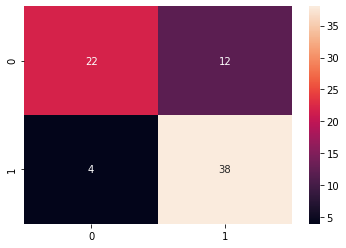

In [41]:
cn = metrics.confusion_matrix(y_test,y_pred)
sn.heatmap(cn,annot=True)

In [ ]:
import plotly.express as px

In [ ]:
px.histogram(data_frame=df,x='target',y='predicted',color='predicted')

In [ ]:
px.scatter(data_frame=df,x='target',y='predicted',color='predicted')

In [42]:
score = metrics.classification_report(y_test,y_pred)
print("\n",score)


               precision    recall  f1-score   support

           0       0.85      0.65      0.73        34
           1       0.76      0.90      0.83        42

    accuracy                           0.79        76
   macro avg       0.80      0.78      0.78        76
weighted avg       0.80      0.79      0.78        76



In [43]:
import pickle

In [44]:
file = open('heartfinal.pkl','wb')
pickle.dump(lr,file)
file.close()